In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict


# Image Path

In [3]:
Base_path = "/content/drive/MyDrive/SmartVisionAI/smartvision_dataset/classification"
Splits = ["train", "val", "test"]
subset_dir   = "/content/drive/MyDrive/SmartVisionAI/smartvision_dataset/classification_subset"

In [4]:
train_dir=os.path.join(subset_dir, "train")
val_dir=os.path.join(subset_dir, "val")
test_dir=os.path.join(Base_path, "test")
print(train_dir)
print(val_dir)
print(test_dir)

/content/drive/MyDrive/SmartVisionAI/smartvision_dataset/classification_subset/train
/content/drive/MyDrive/SmartVisionAI/smartvision_dataset/classification_subset/val
/content/drive/MyDrive/SmartVisionAI/smartvision_dataset/classification/test


In [5]:
print(os.listdir(train_dir))
print(os.listdir(val_dir))
print(os.listdir(test_dir))

['bicycle', 'person', 'motorcycle', 'car', 'airplane', 'bus', 'truck', 'train', 'traffic light', 'stop sign', 'bench', 'cat', 'bird', 'dog', 'horse', 'cow', 'elephant', 'bottle', 'cup', 'pizza', 'bowl', 'cake', 'couch', 'chair', 'bed', 'potted plant']
['person', 'bicycle', 'car', 'motorcycle', 'bus', 'airplane', 'train', 'stop sign', 'truck', 'traffic light', 'bench', 'bird', 'cat', 'horse', 'dog', 'elephant', 'cow', 'cup', 'bottle', 'bowl', 'pizza', 'cake', 'chair', 'couch', 'bed', 'potted plant']
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'train', 'bus', 'traffic light', 'truck', 'stop sign', 'bench', 'bird', 'cat', 'horse', 'dog', 'elephant', 'cow', 'bottle', 'cup', 'pizza', 'bowl', 'cake', 'couch', 'chair', 'potted plant', 'bed']


# Class Count

In [6]:
for splits in Splits:
    split_path=os.path.join(subset_dir, splits)
    classes=sorted(os.listdir(split_path))
    # print(f"Number of classes in {splits} set: {len(classes)}")
    print(f'{splits.upper()} -> {len(classes)} classes')

TRAIN -> 26 classes
VAL -> 26 classes
TEST -> 26 classes


# Image Count

In [7]:
data=[]
for split in Splits:
    split_path=os.path.join(subset_dir, split)
    classes=sorted(os.listdir(split_path))
    for cls in classes:
        cls_path=os.path.join(split_path, cls)
        images=os.listdir(cls_path)
        for img in images:
            img_path=os.path.join(cls_path, img)
            # count=len(img for img in images)
            data.append({'Split':split, 'Class':cls, 'Image_path':img_path})

In [8]:
df_counts=pd.DataFrame(data, columns=['Split', 'Class', 'Image_path'])
df_counts.head()

,Split,Class,Image_path
0,train,airplane,/content/drive/MyDrive/SmartVisionAI/smartvisi...
1,train,airplane,/content/drive/MyDrive/SmartVisionAI/smartvisi...
2,train,airplane,/content/drive/MyDrive/SmartVisionAI/smartvisi...
3,train,airplane,/content/drive/MyDrive/SmartVisionAI/smartvisi...
4,train,airplane,/content/drive/MyDrive/SmartVisionAI/smartvisi...


In [9]:
df_counts['Split'].value_counts()

,count
Split,
train,3900
val,650
test,650


In [10]:
df_counts['Class'].value_counts()

,count
Class,
airplane,200
bed,200
bench,200
bicycle,200
bird,200
bottle,200
bowl,200
bus,200
cake,200


# Number Of Images per Class

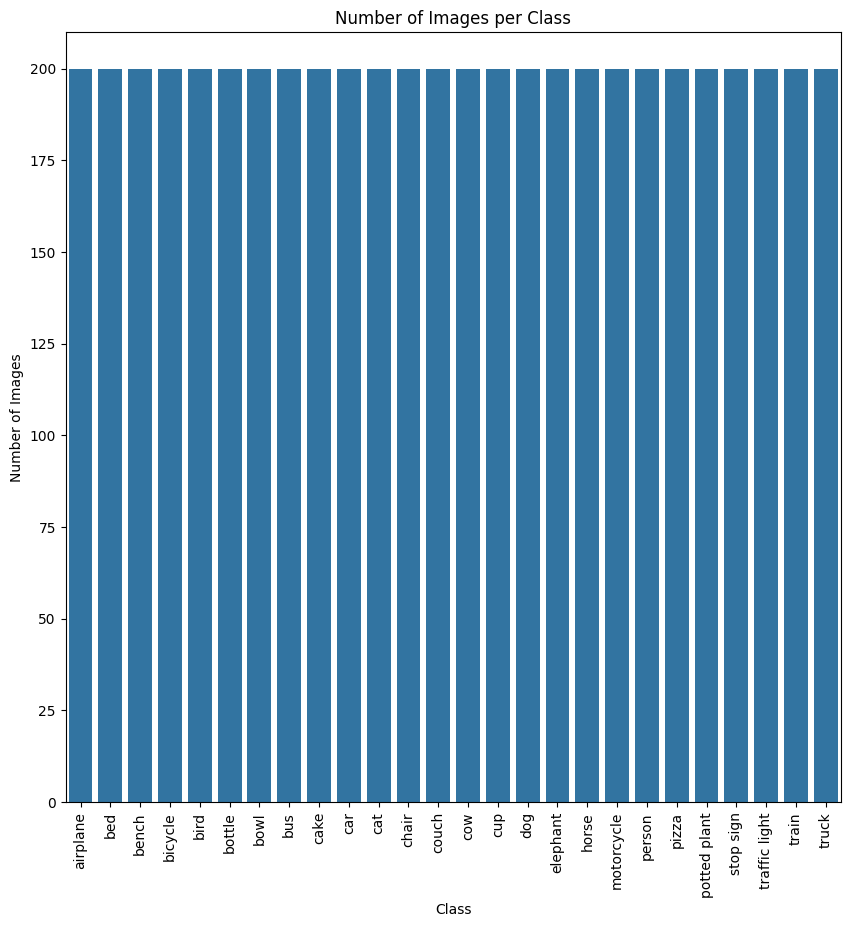

In [11]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(data=df_counts, x='Class')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.xticks(df_counts['Class'].unique(), rotation=90)
plt.ylabel('Number of Images')
plt.show()

In [12]:
pivot_df=df_counts.pivot_table(
    index='Class',
    columns='Split',
    values='Image_path',
    aggfunc='count',
    fill_value=0
)
pivot_df['Total']=pivot_df.sum(axis=1)
pivot_df=pivot_df.sort_values('Total', ascending=False)
pivot_df


Split,test,train,val,Total
Class,,,,
airplane,25,150,25,200
bed,25,150,25,200
bench,25,150,25,200
bicycle,25,150,25,200
bird,25,150,25,200
bottle,25,150,25,200
bowl,25,150,25,200
bus,25,150,25,200
cake,25,150,25,200


# Class Distribution Plot for All Splits

<Figure size 1400x800 with 0 Axes>

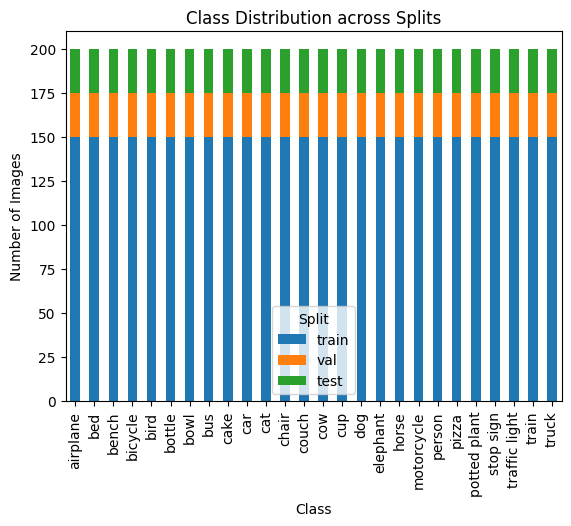

In [13]:
plt.figure(figsize=(14,8))
pivot_df[['train', 'val', 'test']].plot(kind='bar', stacked=True)
plt.title('Class Distribution across Splits')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Class Distribution Pltot for Train

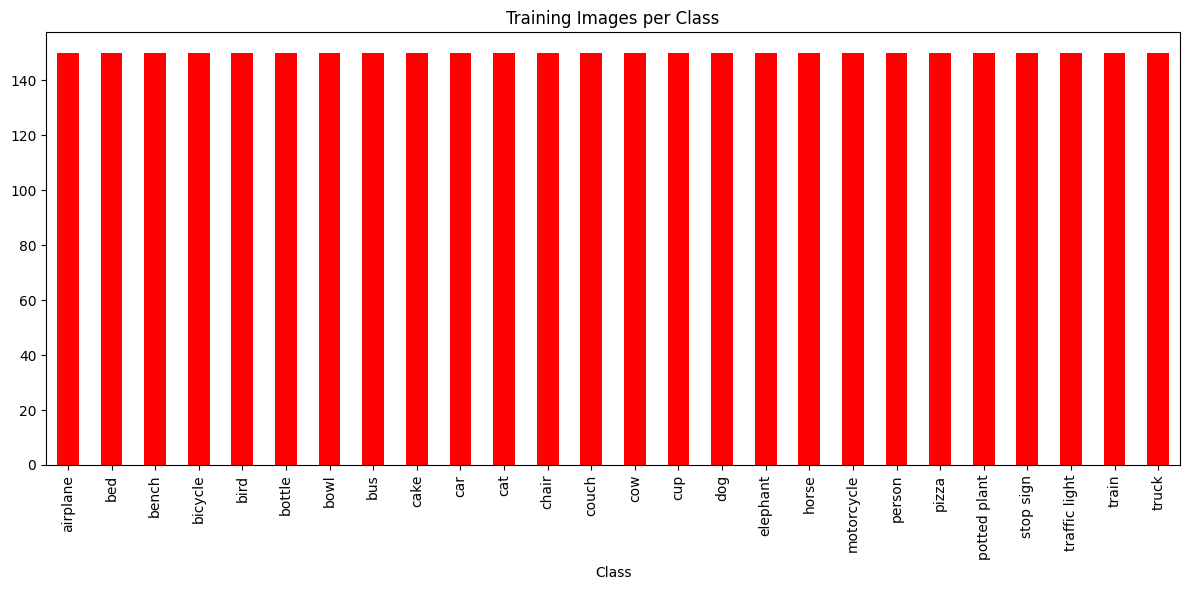

In [14]:
plt.figure(figsize=(12,6))
pivot_df['train'].plot(kind='bar',color='red')
plt.title('Training Images per Class')
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Validation Images per Class

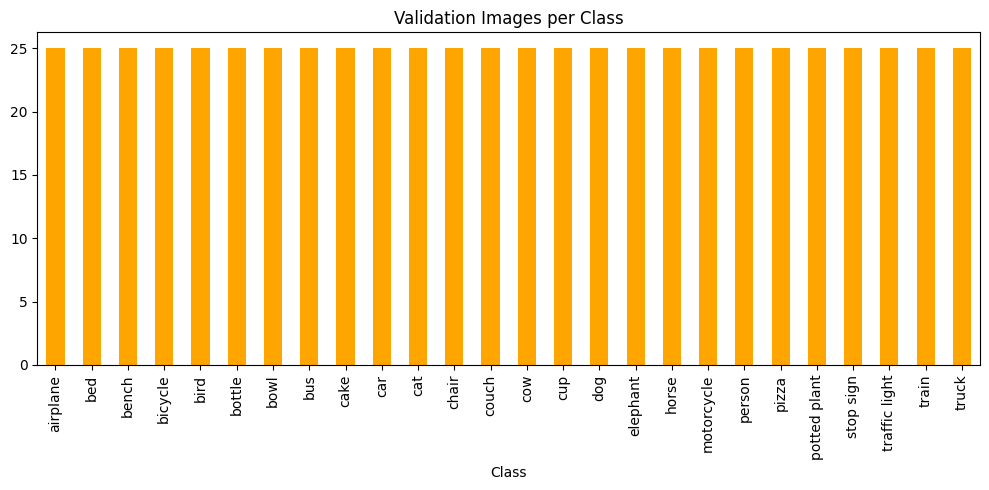

In [15]:
plt.figure(figsize=(10,5))
pivot_df['val'].plot(kind='bar', color='orange')
plt.title('Validation Images per Class')
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Test Images Per Class

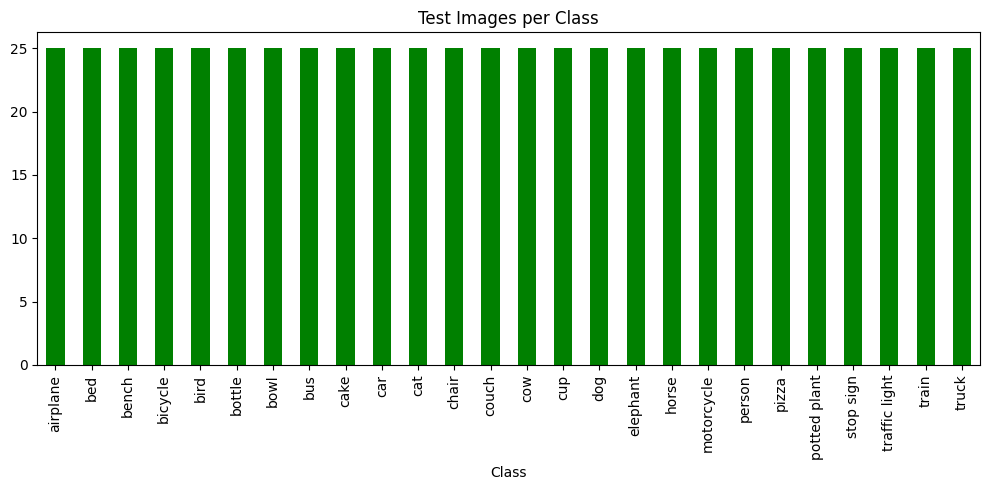

In [16]:
plt.figure(figsize=(10,5))
pivot_df['test'].plot(kind='bar', color='green')
plt.title('Test Images per Class')
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Show Samples of different Images

In [17]:
def show_random_images(split="train", samples_per_class=3):
    split_path = os.path.join(Base_path, split)

    for cls in random.sample(os.listdir(split_path), 25):
        cls_path = os.path.join(split_path, cls)
        images = os.listdir(cls_path)

        plt.figure(figsize=(12, 3))
        for i, img_name in enumerate(random.sample(images, min(samples_per_class, len(images)))):
            img_path = os.path.join(cls_path, img_name)
            img = Image.open(img_path)

            plt.subplot(1, samples_per_class, i + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(cls)

        plt.show()


In [18]:
show_random_images("train")

Output hidden; open in https://colab.research.google.com to view.

# Checking the Images Size

In [19]:
# image_size=[]

# for split in Splits:
#     split_path=os.path.join(Base_path, split)
#     classes=os.listdir(split_path)
#     for cls in os.listdir(split_path):
#         cls_path=os.path.join(split_path, cls)

#         for img_name in os.listdir(cls_path):
#             if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
#                 img_path=os.path.join(cls_path, img_name)
#                 img=Image.open(img_path)
#                 w,h=img.size
#                 image_size.append({'Split':split, 'Class':cls, 'Image_name':img_name, 'Width':w, 'Height':h})



In [20]:
# size_df=pd.DataFrame(image_size, columns=['Split', 'Class', 'Image_name', 'Width', 'Height'])
# size_df.head()

In [21]:
# size_df.describe()

# Image Size Distribution

In [22]:
# plt.figure(figsize=(10,5))

# plt.subplot(1,2,1)

# plt.hist(size_df['Width'], bins=30, color='blue', alpha=0.7)
# plt.title('Distribution of Image Widths')
# plt.xlabel('Width (pixels)')
# plt.ylabel('Frequency')

# plt.subplot(1,2,2)
# plt.hist(size_df['Height'], bins=30, color='green', alpha=0.7)
# plt.title('Distribution of Image Heights')
# plt.xlabel('Height (pixels)')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [23]:
percentage_df = pivot_df.copy()

for split in Splits:
    percentage_df[split] = (percentage_df[split] / percentage_df["Total"]) * 100

percentage_df[Splits].round(2)


Split,train,val,test
Class,,,
airplane,75.0,12.5,12.5
bed,75.0,12.5,12.5
bench,75.0,12.5,12.5
bicycle,75.0,12.5,12.5
bird,75.0,12.5,12.5
bottle,75.0,12.5,12.5
bowl,75.0,12.5,12.5
bus,75.0,12.5,12.5
cake,75.0,12.5,12.5


In [24]:
print(f"Total Images: {pivot_df['Total'].sum()}")
print(f"Total Classes: {pivot_df.shape[0]}")
print("Top 5 Classes by Image Count:")
print(pivot_df.head())

Total Images: 5200
Total Classes: 26
Top 5 Classes by Image Count:
Split     test  train  val  Total
Class                            
airplane    25    150   25    200
bed         25    150   25    200
bench       25    150   25    200
bicycle     25    150   25    200
bird        25    150   25    200


In [25]:
show_random_images('val')

Output hidden; open in https://colab.research.google.com to view.

In [26]:
show_random_images('test')

Output hidden; open in https://colab.research.google.com to view.

# Verify Images sizes

In [27]:
# path_t="smartvision_dataset/classification/train"

for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    img_name = os.listdir(cls_path)[0]
    img = Image.open(os.path.join(cls_path, img_name))
    print(f"{cls}: {img.size}")


bicycle: (224, 224)
person: (224, 224)
motorcycle: (224, 224)
car: (224, 224)
airplane: (224, 224)
bus: (224, 224)
truck: (224, 224)
train: (224, 224)
traffic light: (224, 224)
stop sign: (224, 224)
bench: (224, 224)
cat: (224, 224)
bird: (224, 224)
dog: (224, 224)
horse: (224, 224)
cow: (224, 224)
elephant: (224, 224)
bottle: (224, 224)
cup: (224, 224)
pizza: (224, 224)
bowl: (224, 224)
cake: (224, 224)
couch: (224, 224)
chair: (224, 224)
bed: (224, 224)
potted plant: (224, 224)


# Data Normalization

In [28]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# ImageNet normalization
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

# Preprocessing (NO augmentation)
train_transform = transforms.Compose([
    transforms.ToTensor(),                         # [0,255] → [0,1]
    transforms.Normalize(imagenet_mean, imagenet_std)
])

val_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

# Datasets
train_dataset = datasets.ImageFolder(
    root=f"{train_dir}",
    transform=train_transform
)

val_dataset = datasets.ImageFolder(
    root=f"{val_dir}",
    transform=val_test_transform
)

test_dataset = datasets.ImageFolder(
    root=f"{test_dir}",
    transform=val_test_transform
)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Classes:", train_dataset.classes)
print("Number of classes:", len(train_dataset.classes))


Classes: ['airplane', 'bed', 'bench', 'bicycle', 'bird', 'bottle', 'bowl', 'bus', 'cake', 'car', 'cat', 'chair', 'couch', 'cow', 'cup', 'dog', 'elephant', 'horse', 'motorcycle', 'person', 'pizza', 'potted plant', 'stop sign', 'traffic light', 'train', 'truck']
Number of classes: 26


# Data Augmentation

In [29]:

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2
    ),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Show Augmented Images

In [30]:
def show_augmented_images(dataloader, classes, n=25):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)

    n = min(n, len(images))
    images = images[:n]
    labels = labels[:n]

    mean = torch.tensor(imagenet_mean).view(3, 1, 1)
    std = torch.tensor(imagenet_std).view(3, 1, 1)
    images = images * std + mean

    cols = 5
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()

    for i in range(n):
        img = images[i].permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)

        axes[i].imshow(img)
        axes[i].set_title(classes[labels[i]])
        axes[i].axis('off')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

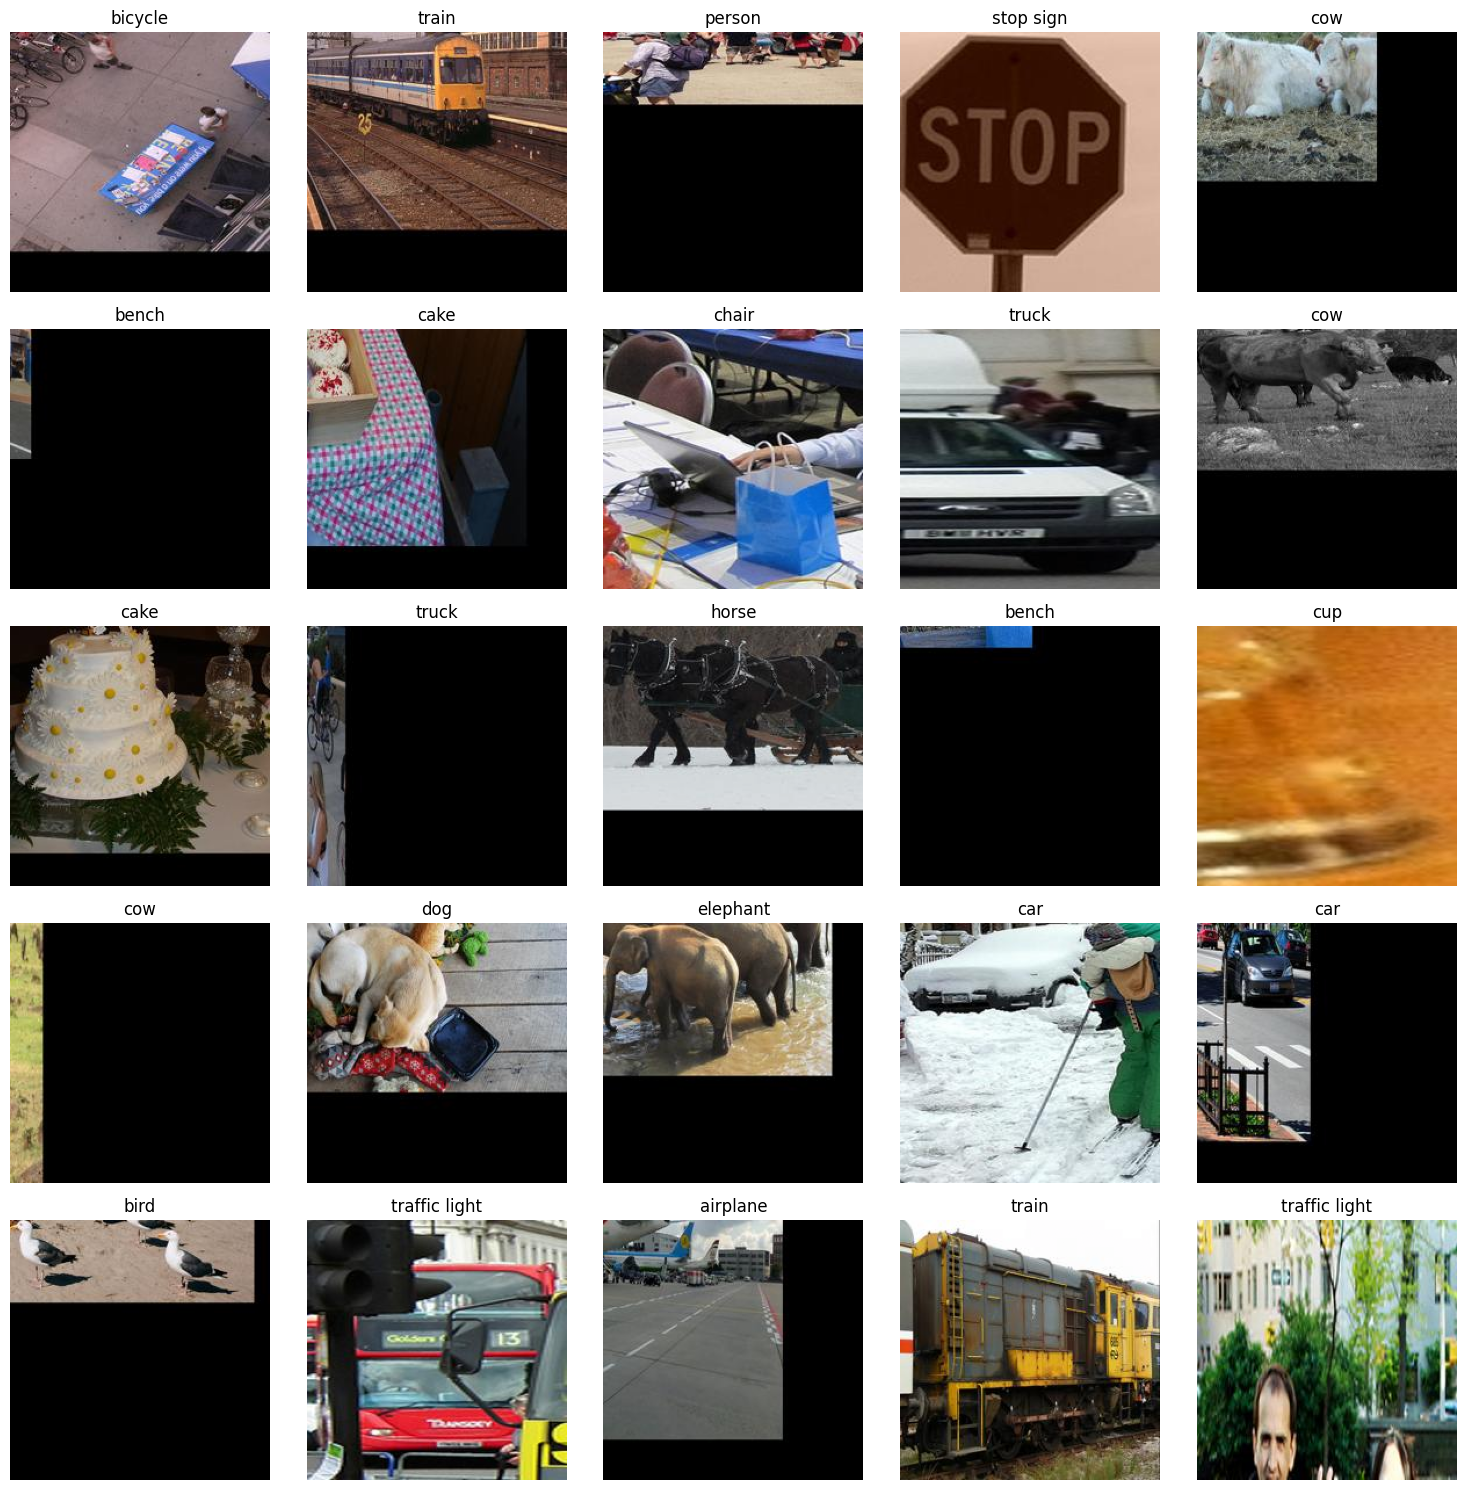

In [31]:
show_augmented_images(train_loader, train_dataset.classes)

In [32]:
images, labels = next(iter(train_loader))

print("Min pixel value:", images.min().item())
print("Max pixel value:", images.max().item())
print("Mean pixel value:", images.mean().item())
print("Std pixel value:", images.std().item())


Min pixel value: -2.1179039478302
Max pixel value: 2.640000104904175
Mean pixel value: -0.9757884740829468
Std pixel value: 1.281642198562622


# Visualizing Normalized vs Unnormalized Images.

In [33]:
def compare_normalized_image(dataset, idx=0):
    img, label = dataset[idx]

    mean = torch.tensor(imagenet_mean).view(3,1,1)
    std  = torch.tensor(imagenet_std).view(3,1,1)
    img_unnorm = img * std + mean

    fig, ax = plt.subplots(1,2, figsize=(8,4))

    ax[0].imshow(img_unnorm.permute(1,2,0))
    ax[0].set_title("Unnormalized")
    ax[0].axis("off")

    ax[1].imshow(img.permute(1,2,0))
    ax[1].set_title("Normalized ")
    ax[1].axis("off")

    plt.show()


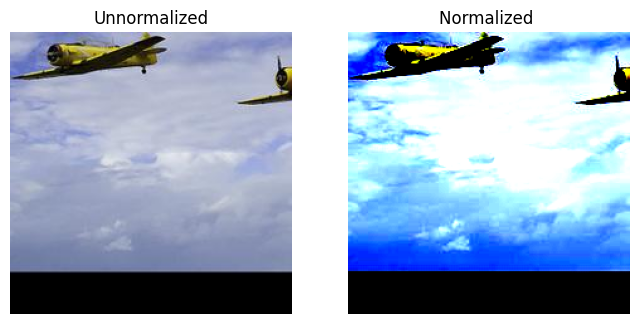

In [34]:
# for i in range(25):
#     compare_normalized_image(train_dataset, idx=i)
compare_normalized_image(train_dataset, idx=20)

# Train Resnet Model

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [36]:
IMG_SIZE = (240, 240)
BATCH_SIZE = 32
NUM_CLASSES = 26


In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [38]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 3900 images belonging to 26 classes.
Found 650 images belonging to 26 classes.


In [39]:
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(240, 240, 3)
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
for layer in base_model.layers[:-10]:  # 🔥 freeze ~90%
    layer.trainable = False


In [41]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [42]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 246, 246,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 120, 120,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 120, 120,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 120, 120,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 122, 122,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 60, 60,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 60, 60,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 60, 60,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 60, 60,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 60, 60,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 60, 60,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 60, 60,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 60, 60,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 60, 60,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 60, 60,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 60, 60,    │      1,024 │ conv2_block1_3_c

 Total params: 24,127,130 (92.04 MB)

 Trainable params: 5,000,986 (19.08 MB)

 Non-trainable params: 19,126,144 (72.96 MB)

In [43]:
callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=3
    ),
    ModelCheckpoint(
        "resnet50_best_model.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]


In [44]:
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=25,
#     callbacks=callbacks
# )


In [45]:
for layer in base_model.layers[-50:]:
    layer.trainable = True


In [46]:
model.compile(
    optimizer=Adam(learning_rate=3e-5),  # ⬆️ from 1e-5
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [47]:
history=model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 64/122 ━━━━━━━━━━━━━━━━━━━━ 7:57 8s/step - accuracy: 0.0438 - loss: 4.3102

KeyboardInterrupt: 

In [ ]:
# plt.figure(figsize=(12,4))

# plt.subplot(1,2,1)
# plt.plot(history.history["accuracy"], label="Train Acc")
# plt.plot(history.history["val_accuracy"], label="Val Acc")
# plt.legend()
# plt.title("Accuracy")

# plt.subplot(1,2,2)
# plt.plot(history.history["loss"], label="Train Loss")
# plt.plot(history.history["val_loss"], label="Val Loss")
# plt.legend()
# plt.title("Loss")

# plt.show()
